In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [71]:
g = RandGraph(actors=10000,graph_type='simple', moving=1)

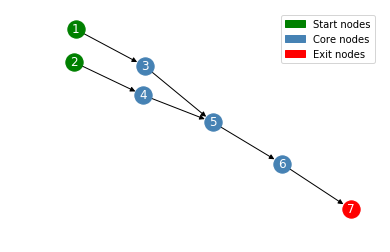

In [4]:
g.plot()

In [6]:
def get_reward(g, state, prev_output):
    # number of actors out
    out = sum([len(g.graph.node[n]['actors']) for n in g.exit_nodes if g.graph.node[n]['actors']])
    # saturation of the core nodes
    congestion = 1 - np.mean(state)
    # reward combine the output evolution and the congestion level
    reward = (out - prev_output) * congestion
    prev_output = out
    return reward, prev_output

In [86]:
g = RandGraph(actors=10000,graph_type='simple', moving=1)
old_reward = []
new_reward = []
prev_output = 0
for step in range(100):
    state, old_rw = g.action()
    new_rw, prev_output = get_reward(g, state, prev_output)
    old_reward.append(old_rw)
    new_reward.append(new_rw)

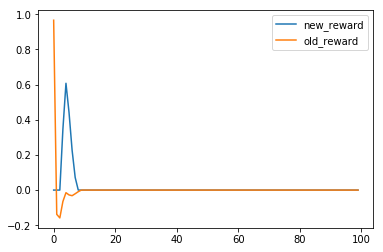

In [87]:
pd.DataFrame({'old_reward': old_reward, 'new_reward': new_reward}).plot()
plt.show()

In [88]:
sum(new_reward)

1.6904761904761905

In [89]:
sum(old_reward)

0.5

### Random actions

In [90]:
g = RandGraph(actors=10000,graph_type='simple', moving=1)
old_reward = []
new_reward = []
prev_output = 0
for step in range(100):
    n = random.sample(g.core_nodes, random.randint(0,len(g.core_nodes)))
    state, old_rw = g.action(n)
    new_rw, prev_output = get_reward(g, state, prev_output)
    old_reward.append(old_rw)
    new_reward.append(new_rw)

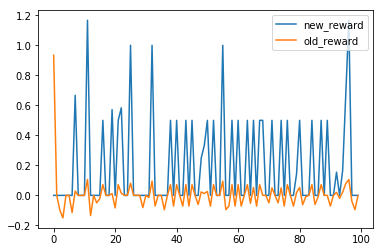

In [91]:
pd.DataFrame({'old_reward': old_reward, 'new_reward': new_reward}).plot()
plt.show()

In [92]:
sum(new_reward)

19.369047619047624

In [93]:
sum(old_reward)

0.5714285714285714

## Biased random actions

In [94]:
list(set(random.choices(g.core_nodes, weights=[7,6,2,2], k= random.randint(0,len(g.core_nodes)))))

[3, 6]

In [95]:
g = RandGraph(actors=10000,graph_type='simple', moving=1)
old_reward = []
new_reward = []
prev_output = 0
for step in range(100):
    n = list(set(random.choices(g.core_nodes, 
                                weights=[7,6,2,2], 
                                k= random.randint(0,len(g.core_nodes)))))
    state, old_rw = g.action(n)
    new_rw, prev_output = get_reward(g, state, prev_output)
    old_reward.append(old_rw)
    new_reward.append(new_rw)

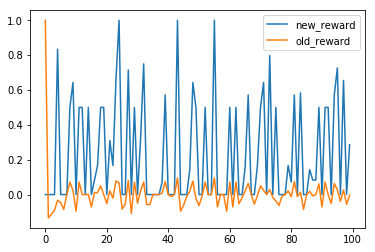

In [96]:
pd.DataFrame({'old_reward': old_reward, 'new_reward': new_reward}).plot()
plt.show()

In [97]:
sum(new_reward)

23.357142857142854

In [98]:
sum(old_reward)

0.5384615384615384

In [99]:
df = pd.DataFrame({'old_reward': old_reward, 'new_reward': new_reward})

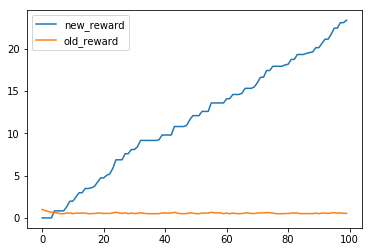

In [100]:
df.cumsum().plot()
plt.show()